In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm
import mceq_underground_helpers_cs_smooth as mh

In [2]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [3]:
angles = mh.angles
cs_p1 = [0.95,1.00,1.05]
cs_p2 = [1.00]
#add threshold energies

In [5]:
# Load the pickle file
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_sibyll23c_smooth.pkl", "rb") as file:
    data = pickle.load(file)

# Print or inspect the data
print(data)


{('1.5', '0.95', '1.0', '2212', 'jan'): array([0.94074928, 0.94021402, 0.94091457]), ('1.5', '0.95', '1.0', '2212', 'apr'): array([1.00900153, 1.00778009, 1.00598979]), ('1.5', '0.95', '1.0', '2212', 'jul'): array([1.07338578, 1.06476072, 1.05560692]), ('1.5', '1.0', '1.0', '2212', 'jan'): array([0.93174906, 0.93242547, 0.93496773]), ('1.5', '1.0', '1.0', '2212', 'apr'): array([1., 1., 1.]), ('1.5', '1.0', '1.0', '2212', 'jul'): array([1.06408099, 1.0567846 , 1.04942338]), ('1.5', '1.05', '1.0', '2212', 'jan'): array([0.92364322, 0.92508055, 0.92936828]), ('1.5', '1.05', '1.0', '2212', 'apr'): array([0.99186506, 0.99278719, 0.99415009]), ('1.5', '1.05', '1.0', '2212', 'jul'): array([1.05529714, 1.04918519, 1.04369978]), ('3.5', '0.95', '1.0', '2212', 'jan'): array([0.9116563 , 0.92188165, 0.9288492 ]), ('3.5', '0.95', '1.0', '2212', 'apr'): array([0.99757463, 1.00318104, 1.00611135]), ('3.5', '0.95', '1.0', '2212', 'jul'): array([1.12248451, 1.11163703, 1.10359821]), ('3.5', '1.0', '1.

In [19]:
def get_data(fixed_params):
    values = sorted({key[1] for key in data.keys() if key[0] == fixed_params[0] and key[2] == fixed_params[1] and key[3] == fixed_params[2]})

    # Collect data for each cs
    sel_data = [data[(fixed_params[0], cs_p1, "1.0", fixed_params[1], fixed_params[2],fixed_params[3])] for cs_p1 in values]

    return np.array(sel_data)

In [21]:
def get_data(fixed_params):
    values = sorted({
        (key[1], key[2])  # Extract both cs_p1 and cs_p2
        for key in data.keys()
        if key[0] == fixed_params[0] and key[3] == fixed_params[1] and key[4] == fixed_params[2]
    })

    # Collect data for each (cs_p1, cs_p2)
    sel_data = [data[(fixed_params[0], cs_p1, cs_p2, fixed_params[1], fixed_params[2])] for cs_p1, cs_p2 in values]

    return np.array(sel_data)

In [26]:
def get_data(fixed_params, fixed_cs=None, cs_type="cs_p1"):
    """
    Retrieve data by fixing one of cs_p1 or cs_p2 and looping over the other.

    Parameters:
        fixed_params (tuple): Fixed parameters (ptype, e0, e1).
        fixed_cs (float, optional): Value of the fixed scaling factor (cs_p1 or cs_p2).
        cs_type (str, optional): Whether to fix 'cs_p1' or 'cs_p2'. Default is 'cs_p1'.

    Returns:
        np.array: Selected data based on the filtering condition.
    """
    cs_index_fixed = 1 if cs_type == "cs_p1" else 2  # Index for cs_p1 or cs_p2
    cs_index_loop = 2 if cs_type == "cs_p1" else 1  # Index for the other parameter

    # Get all values of the parameter to loop over
    values = sorted({
        key[cs_index_loop] for key in data.keys()
        if key[0] == fixed_params[0] and key[cs_index_fixed] == fixed_cs and key[3] == fixed_params[1] and key[4] == fixed_params[2]
    })

    # Collect data for each value of the looping parameter
    sel_data = [
        data[(fixed_params[0], fixed_cs, cs, fixed_params[1], fixed_params[2])] if cs_type == "cs_p1" 
        else data[(fixed_params[0], cs, fixed_cs, fixed_params[1], fixed_params[2])]
        for cs in values
    ]

    return np.array(sel_data)


In [27]:
fixed_params = ("2212", "jan", "some_value")
fixed_cs_p1 = 1.05
result = get_data(fixed_params, fixed_cs=fixed_cs_p1, cs_type="cs_p1")


In [18]:
data[('1.5','0.95','1.0','2212','apr')]

array([1.00900153, 1.00778009, 1.00598979])

In [25]:
get_data(("3.5", "2212", "apr"))

array([[0.99757463, 1.00318104, 1.00611135],
       [1.        , 1.        , 1.        ],
       [1.00267385, 0.99726094, 0.99332068]])

In [23]:
data_d15_p_apr = get_data(("1.5", "2212", "apr"))
data_d35_p_apr = get_data(("3.5", "2212", "apr"))

data_d15_p_jan = get_data(("1.5", "2212", "jan"))
data_d35_p_jan = get_data(("3.5", "2212", "jan"))

data_d15_p_jul = get_data(("1.5", "2212", "jul"))
data_d35_p_jul = get_data(("3.5", "2212", "jul"))









In [9]:
data_d35_p_jul

array([], dtype=float64)

In [7]:
# get angles for the R values

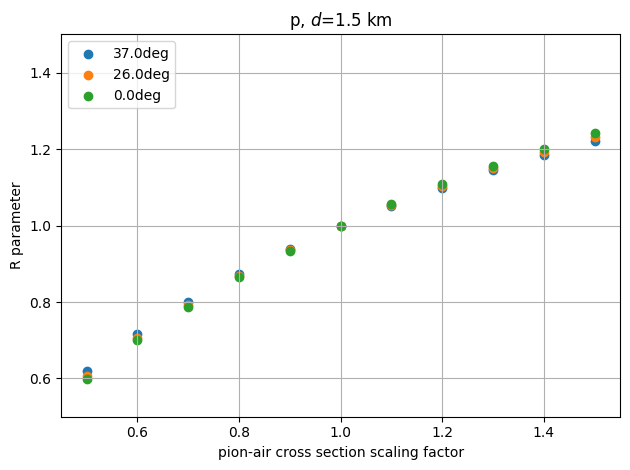

In [10]:
plt.figure()
for i in range(3):
    plt.scatter(cs, data_d15_p_apr[:,i],label=str(np.round(angles[i],decimals=0)) + 'deg')

plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.legend(loc='upper left')
plt.title('p, $d$=1.5 km')
plt.ylim(0.5,1.5)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_p.png' )


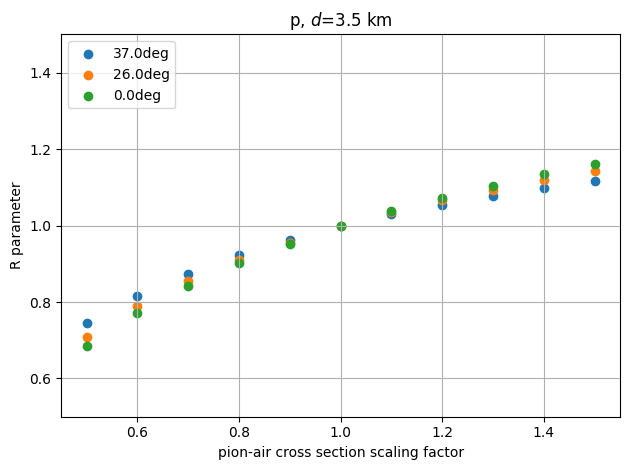

In [11]:
plt.figure()
for i in range(3):
    plt.scatter(cs, data_d35_p_apr[:,i],label=str(np.round(angles[i],decimals=0)) + 'deg')

plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.legend(loc='upper left')
plt.title('p, $d$=3.5 km')
plt.ylim(0.5,1.5)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_p.png' )

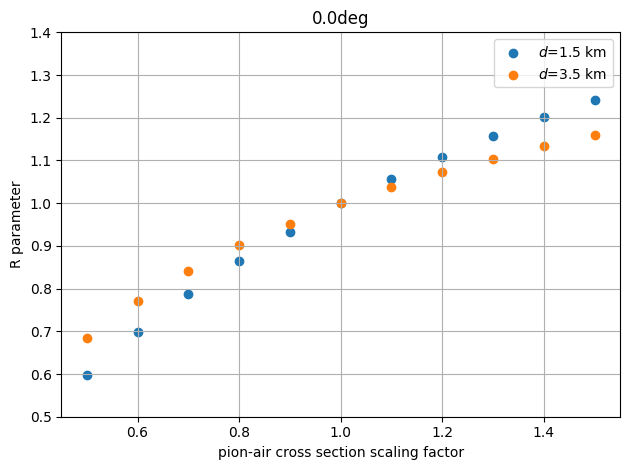

In [13]:
plt.figure()
plt.scatter(cs, data_d15_p_apr[:,2],label='$d$=1.5 km')
plt.scatter(cs, data_d35_p_apr[:,2],label ='$d$=3.5 km')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.legend()
plt.title(str(np.round(angles[2],decimals=0)) + 'deg')
plt.ylim(0.5,1.4)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth_p_0zenith.png' )



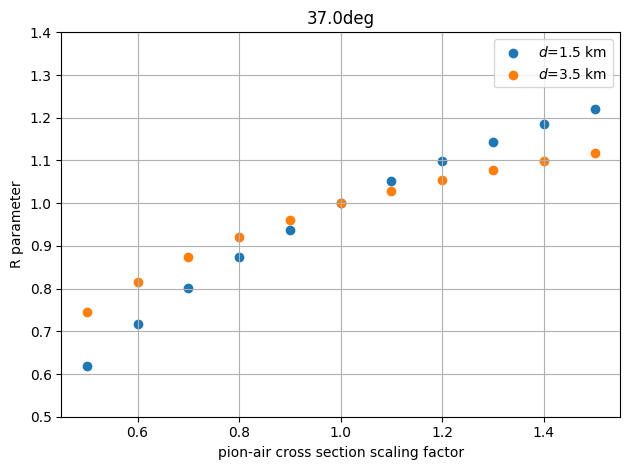

In [14]:
plt.figure()
plt.scatter(cs, data_d15_p_apr[:,0],label='$d$=1.5 km')
plt.scatter(cs, data_d35_p_apr[:,0],label ='$d$=3.5 km')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.legend()
plt.title(str(np.round(angles[0],decimals=0)) + 'deg')
plt.ylim(0.5,1.4)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth_p_37zenith.png' )

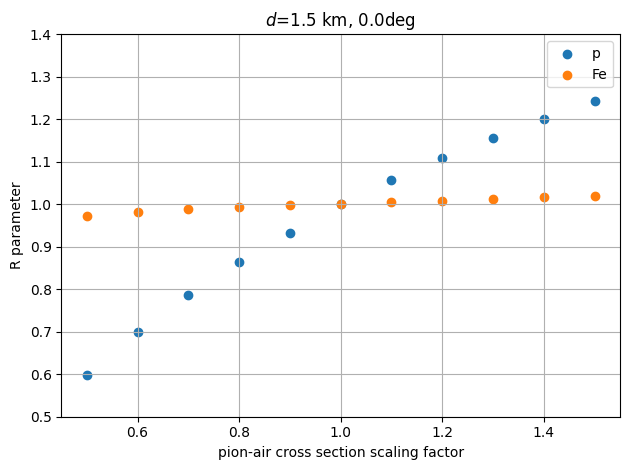

In [23]:
plt.figure()
plt.scatter(cs, data_d15_p_apr[:,2],label='p')
plt.scatter(cs, data_d15_fe_apr[:,2],label ='Fe')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=1.5 km, ' + str(np.round(angles[2],decimals=0)) + 'deg')
plt.legend()
plt.ylim(0.5,1.4)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_nucleus_zenith.png' )


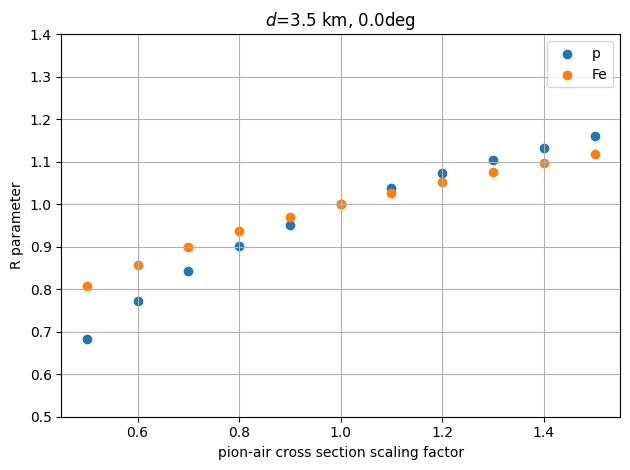

In [24]:
plt.figure()
plt.scatter(cs, data_d35_p_apr[:,2],label='p')
plt.scatter(cs, data_d35_fe_apr[:,2],label ='Fe')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=3.5 km, ' + str(np.round(angles[2],decimals=0)) + 'deg')
plt.ylim(0.5,1.4)
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_nucleus_0zenith.png' )

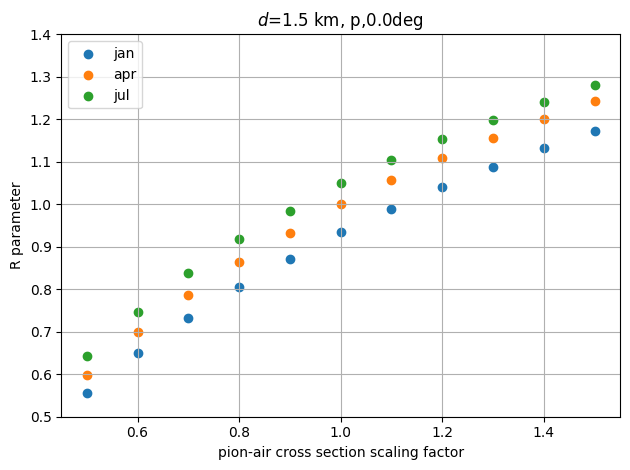

In [22]:
plt.figure()
plt.scatter(cs, data_d15_p_jan[:,2],label='jan')
plt.scatter(cs, data_d15_p_apr[:,2],label ='apr')
plt.scatter(cs, data_d15_p_jul[:,2],label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=1.5 km, p,' + str(np.round(angles[2],decimals=0)) + 'deg')
plt.ylim(0.5,1.4)
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_p_season_0zenith.png' )


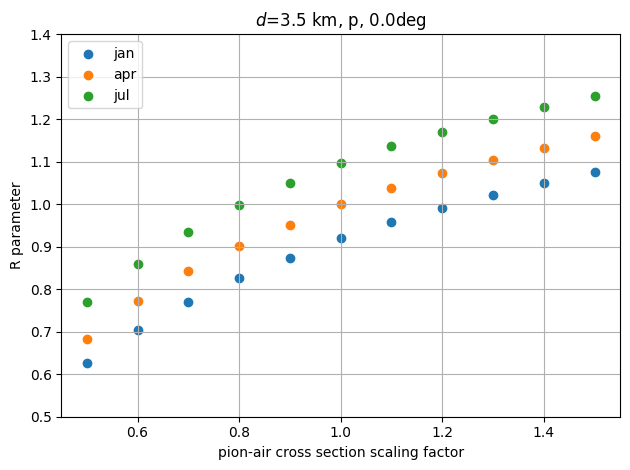

In [27]:
plt.figure()
plt.scatter(cs, data_d35_p_jan[:,2],label='jan')
plt.scatter(cs, data_d35_p_apr[:,2],label ='apr')
plt.scatter(cs, data_d35_p_jul[:,2],label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=3.5 km, p, '+ str(np.round(angles[2],decimals=0)) + 'deg')
plt.ylim(0.5,1.4)
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth3.5_p_season_0zenith.png' )

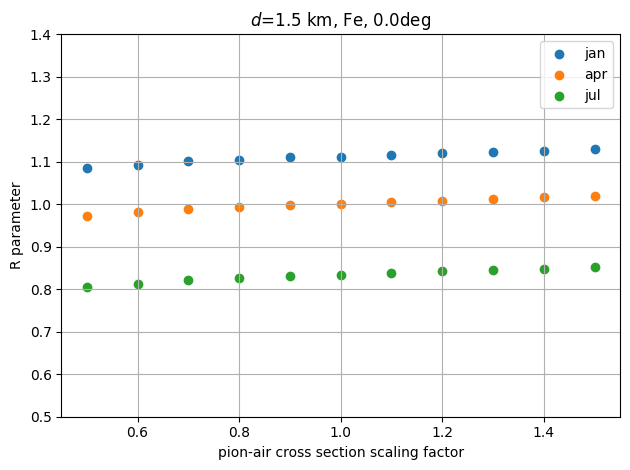

In [29]:
plt.figure()
plt.scatter(cs, data_d15_fe_jan[:,2],label='jan')
plt.scatter(cs, data_d15_fe_apr[:,2],label ='apr')
plt.scatter(cs, data_d15_fe_jul[:,2],label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=1.5 km, Fe, '+ str(np.round(angles[2],decimals=0)) + 'deg')
plt.ylim(0.5,1.4)
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'R_depth1.5_fe_season_0zenith.png' )

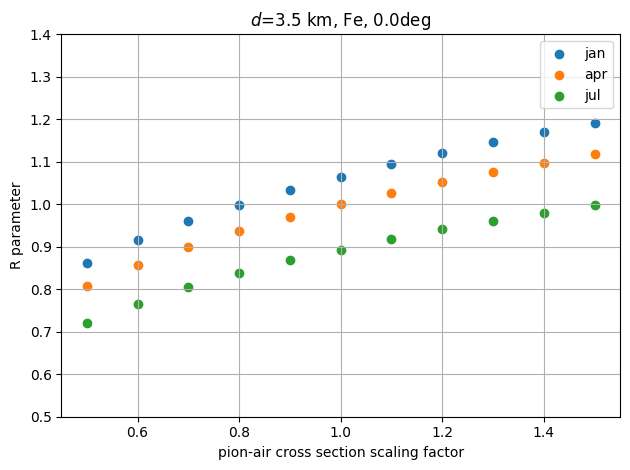

In [30]:
plt.figure()
plt.scatter(cs, data_d35_fe_jan[:,2],label='jan')
plt.scatter(cs, data_d35_fe_apr[:,2],label ='apr')
plt.scatter(cs, data_d35_fe_jul[:,2],label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=3.5 km, Fe, '+ str(np.round(angles[2],decimals=0)) + 'deg')
plt.ylim(0.5,1.4)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth3.5_fe_season_0zenith.png' )

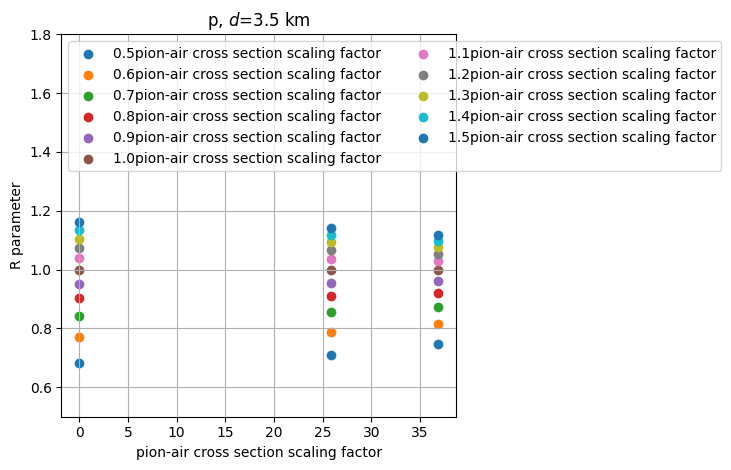

In [34]:
# plots against quantity

plt.figure()
for i in range(11):
    plt.scatter(angles, data_d35_p_apr[i],label=str(cs[i]) + 'pion-air cross section scaling factor')

plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.legend(loc='upper left',ncol=2)
plt.title('p, $d$=3.5 km')
plt.ylim(0.5,1.8)
plt.tight_layout()
plt.grid()
plt.savefig(plot_dir + 'Rvsangle_depth3.5_p.png' )